# WiDS Datathon

Competition link: https://www.kaggle.com/competitions/widsdatathon2024-challenge1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from IPython.display import display
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier

from eda import get_missing_summary, plot_distributions_by_target

data_path = pathlib.Path("data")
raw_path = data_path / pathlib.Path("raw")
training_data_path = raw_path / pathlib.Path("training.csv")
test_data_path = raw_path / pathlib.Path("test.csv")

/var/folders/h_/1wt571f136n_t4j7p0xw3fnc0000gn/T/ipykernel_53854/2430408892.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## EDA

First, look at all columns in the data.

In [3]:
df_train  = pd.read_csv(training_data_path)
display(df_train.shape)
display(df_train.head())
display(df_train.describe())
display(df_train.info())

(12906, 83)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
count,12906.000000,12906.000000,12906.000000,3941.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,...,12905.000000,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12877.000000,12877.000000,12877.000000,12906.000000
mean,547381.196033,573.754300,59.183326,28.984539,20744.441237,1581.950419,40.502259,11.122784,12.945265,13.290376,...,13.335299,13.406950,4.474956,27.978387,8.575284,7.083376,39.822352,7.475221,16.098988,0.624516
std,260404.959974,275.447534,13.335216,5.696906,13886.903756,2966.305306,4.036963,1.512376,1.923974,3.354103,...,3.690949,5.222495,4.837085,5.083939,4.203482,3.109022,3.559492,1.516499,5.842501,0.484266
min,100063.000000,101.000000,18.000000,14.000000,635.545455,0.916667,20.600000,0.000000,6.314286,5.925000,...,4.600000,3.433333,0.000000,12.460784,2.440000,1.200000,30.939316,2.636008,2.760371,0.000000
25%,321517.000000,331.000000,50.000000,24.660000,9463.896552,171.857143,37.129825,10.160000,11.741176,11.013415,...,10.270492,9.663333,0.994444,24.933333,5.618750,4.929688,37.698880,6.651215,11.280694,0.000000
50%,543522.000000,554.000000,59.000000,28.190000,19154.190480,700.337500,40.639344,11.039216,12.923944,12.538095,...,12.884000,12.177778,2.747222,27.788235,7.465714,6.847059,39.108249,7.686577,15.589148,1.000000
75%,772671.750000,846.000000,67.000000,32.920000,30021.278690,1666.515385,42.934783,12.190000,14.019767,14.971053,...,15.555405,16.635556,5.976000,30.709375,10.617442,8.620000,41.136513,8.276922,20.801880,1.000000
max,999896.000000,999.000000,91.000000,85.000000,71374.131580,21172.000000,54.570000,17.675000,35.300000,62.100000,...,35.155556,38.347826,26.755000,48.020000,27.566102,25.200000,52.237210,11.169408,31.504775,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

None

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

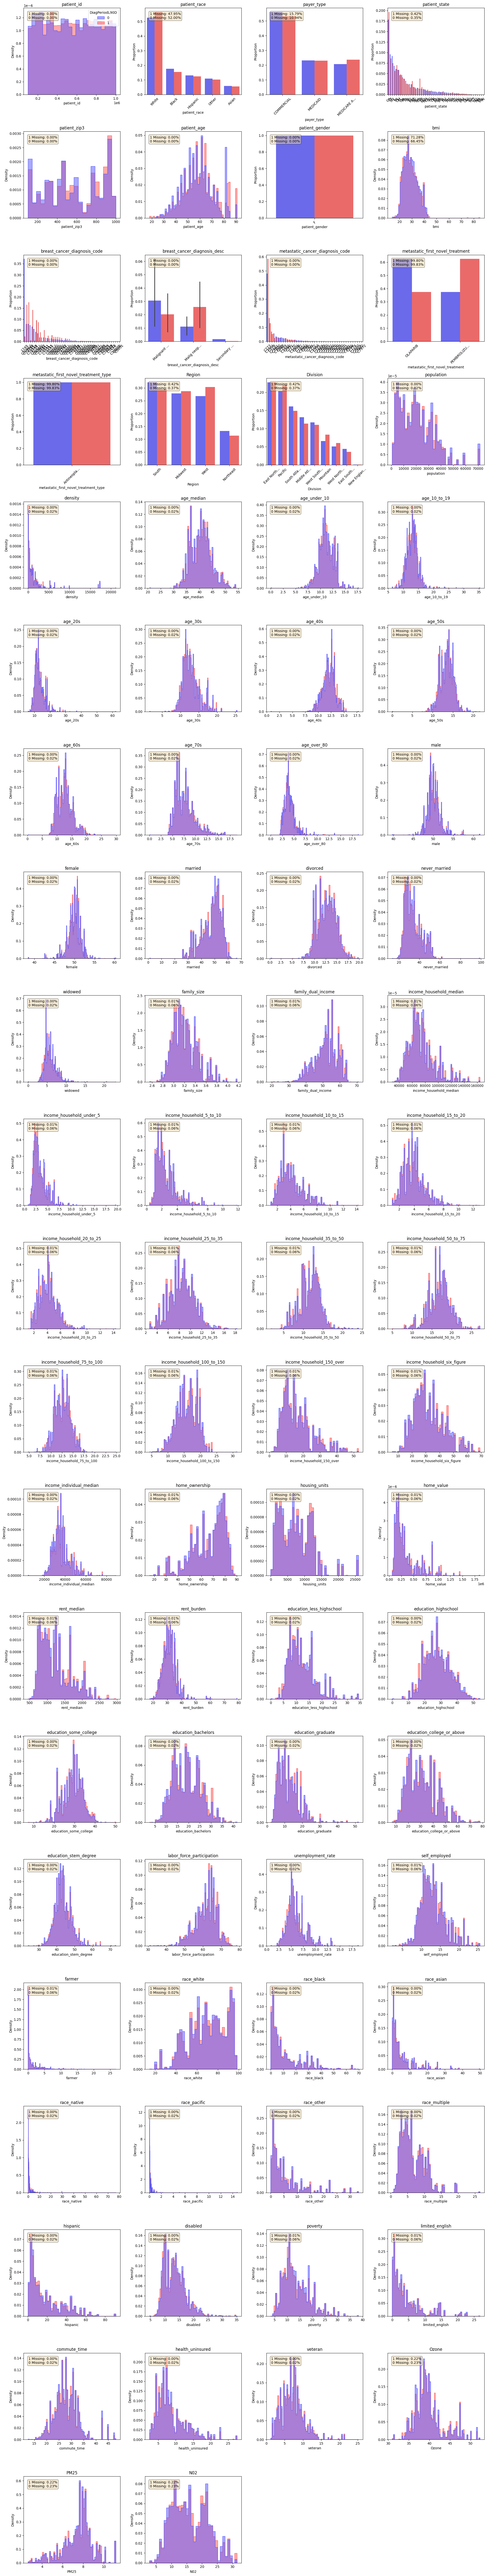

In [4]:
# Use this to plot all the features
plot_distributions_by_target(df_train, 'DiagPeriodL90D')

### Handle Missing Values

look at which columns have highest proportion of missing values.

In [5]:
missing = get_missing_summary(df_train)
display(missing)

{'metastatic_first_novel_treatment': 99.81403998140401,
 'metastatic_first_novel_treatment_type': 99.81403998140401,
 'bmi': 69.46381527971485,
 'patient_race': 49.47311328064466,
 'payer_type': 13.97024639702464,
 'Region': 0.40291337362467067,
 'Division': 0.40291337362467067,
 'patient_state': 0.39516503951650395,
 'Ozone': 0.2247016891368356,
 'PM25': 0.2247016891368356,
 'N02': 0.2247016891368356,
 'family_size': 0.03099333643266698,
 'family_dual_income': 0.03099333643266698,
 'income_household_median': 0.03099333643266698,
 'income_household_under_5': 0.03099333643266698,
 'income_household_5_to_10': 0.03099333643266698,
 'income_household_10_to_15': 0.03099333643266698,
 'income_household_15_to_20': 0.03099333643266698,
 'income_household_20_to_25': 0.03099333643266698,
 'income_household_25_to_35': 0.03099333643266698,
 'income_household_35_to_50': 0.03099333643266698,
 'income_household_50_to_75': 0.03099333643266698,
 'income_household_75_to_100': 0.03099333643266698,
 'inco

Categorical columns with only one category are useless.

In [6]:
# Look at categorical columns and their unique values
display(df_train.select_dtypes(include=['object']).nunique())
# Look at integer columns and their unique values
display(df_train.select_dtypes(include=['int64']).nunique())


patient_race                              5
payer_type                                3
patient_state                            50
patient_gender                            1
breast_cancer_diagnosis_code             50
breast_cancer_diagnosis_desc             50
metastatic_cancer_diagnosis_code         43
metastatic_first_novel_treatment          2
metastatic_first_novel_treatment_type     1
Region                                    4
Division                                  9
dtype: int64

patient_id        12906
patient_zip3        739
patient_age          67
DiagPeriodL90D        2
dtype: int64

In [7]:
display(df_train['metastatic_first_novel_treatment_type'].value_counts(dropna=False))

metastatic_first_novel_treatment_type
NaN                12882
Antineoplastics       24
Name: count, dtype: int64

<Axes: >

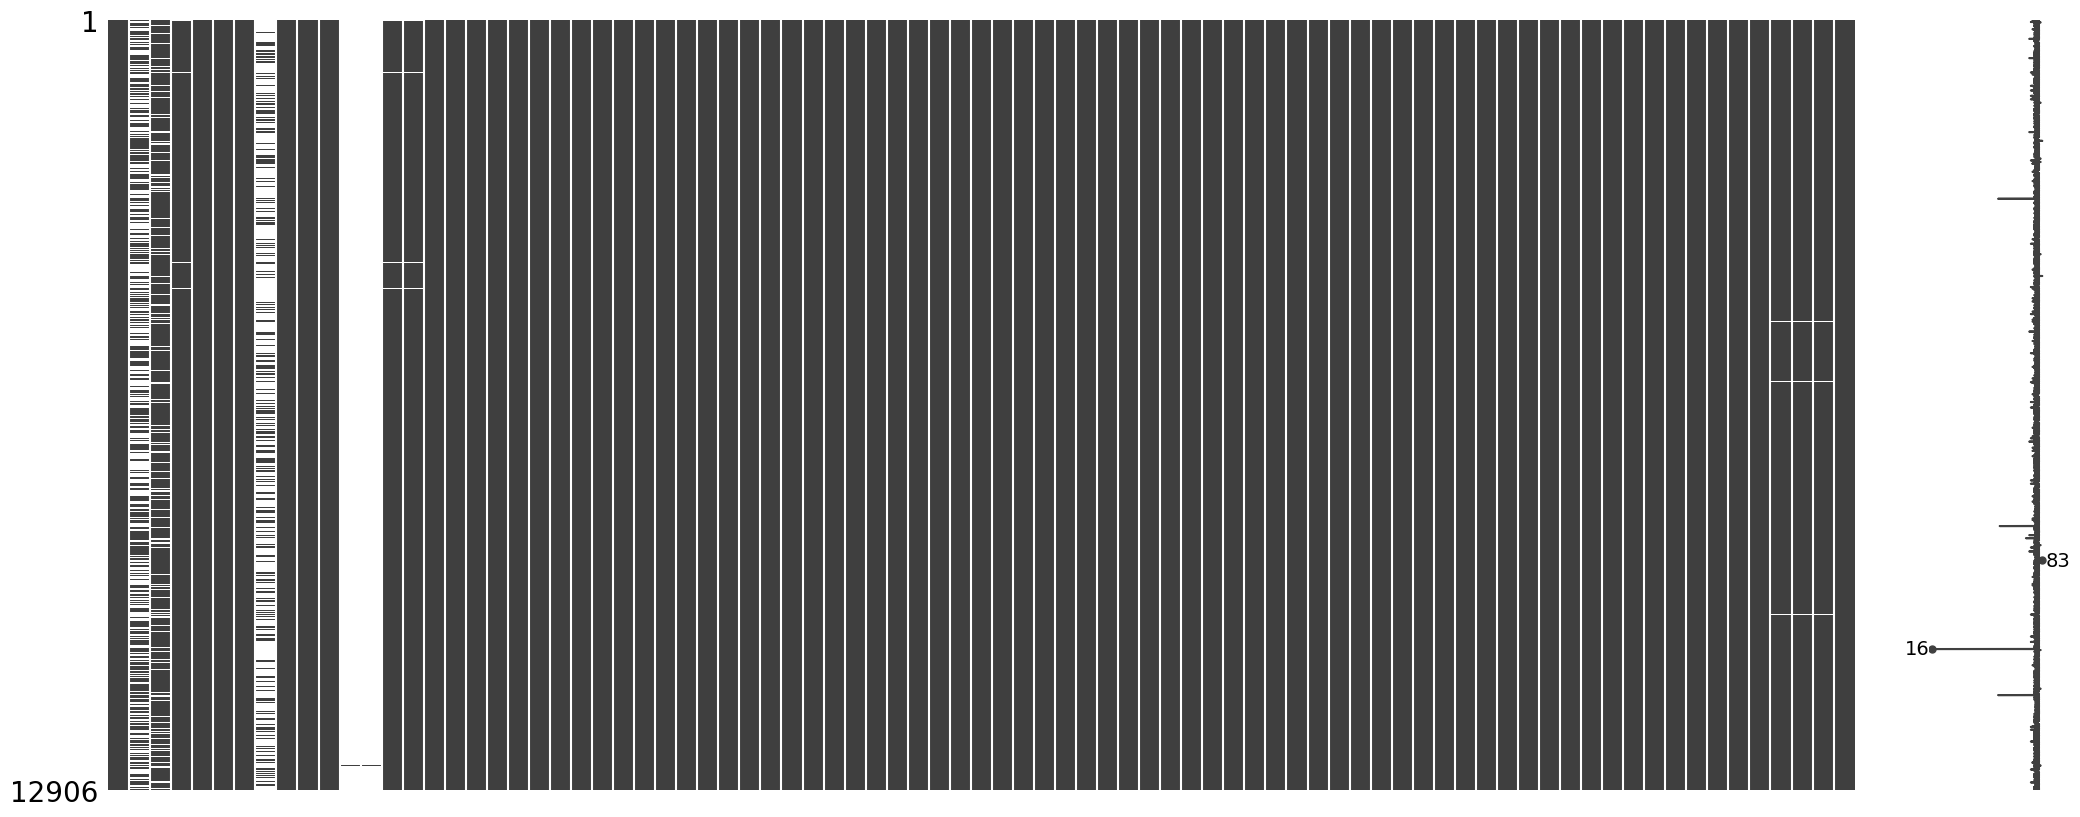

In [8]:
import missingno

missingno.matrix(df_train)

<Axes: >

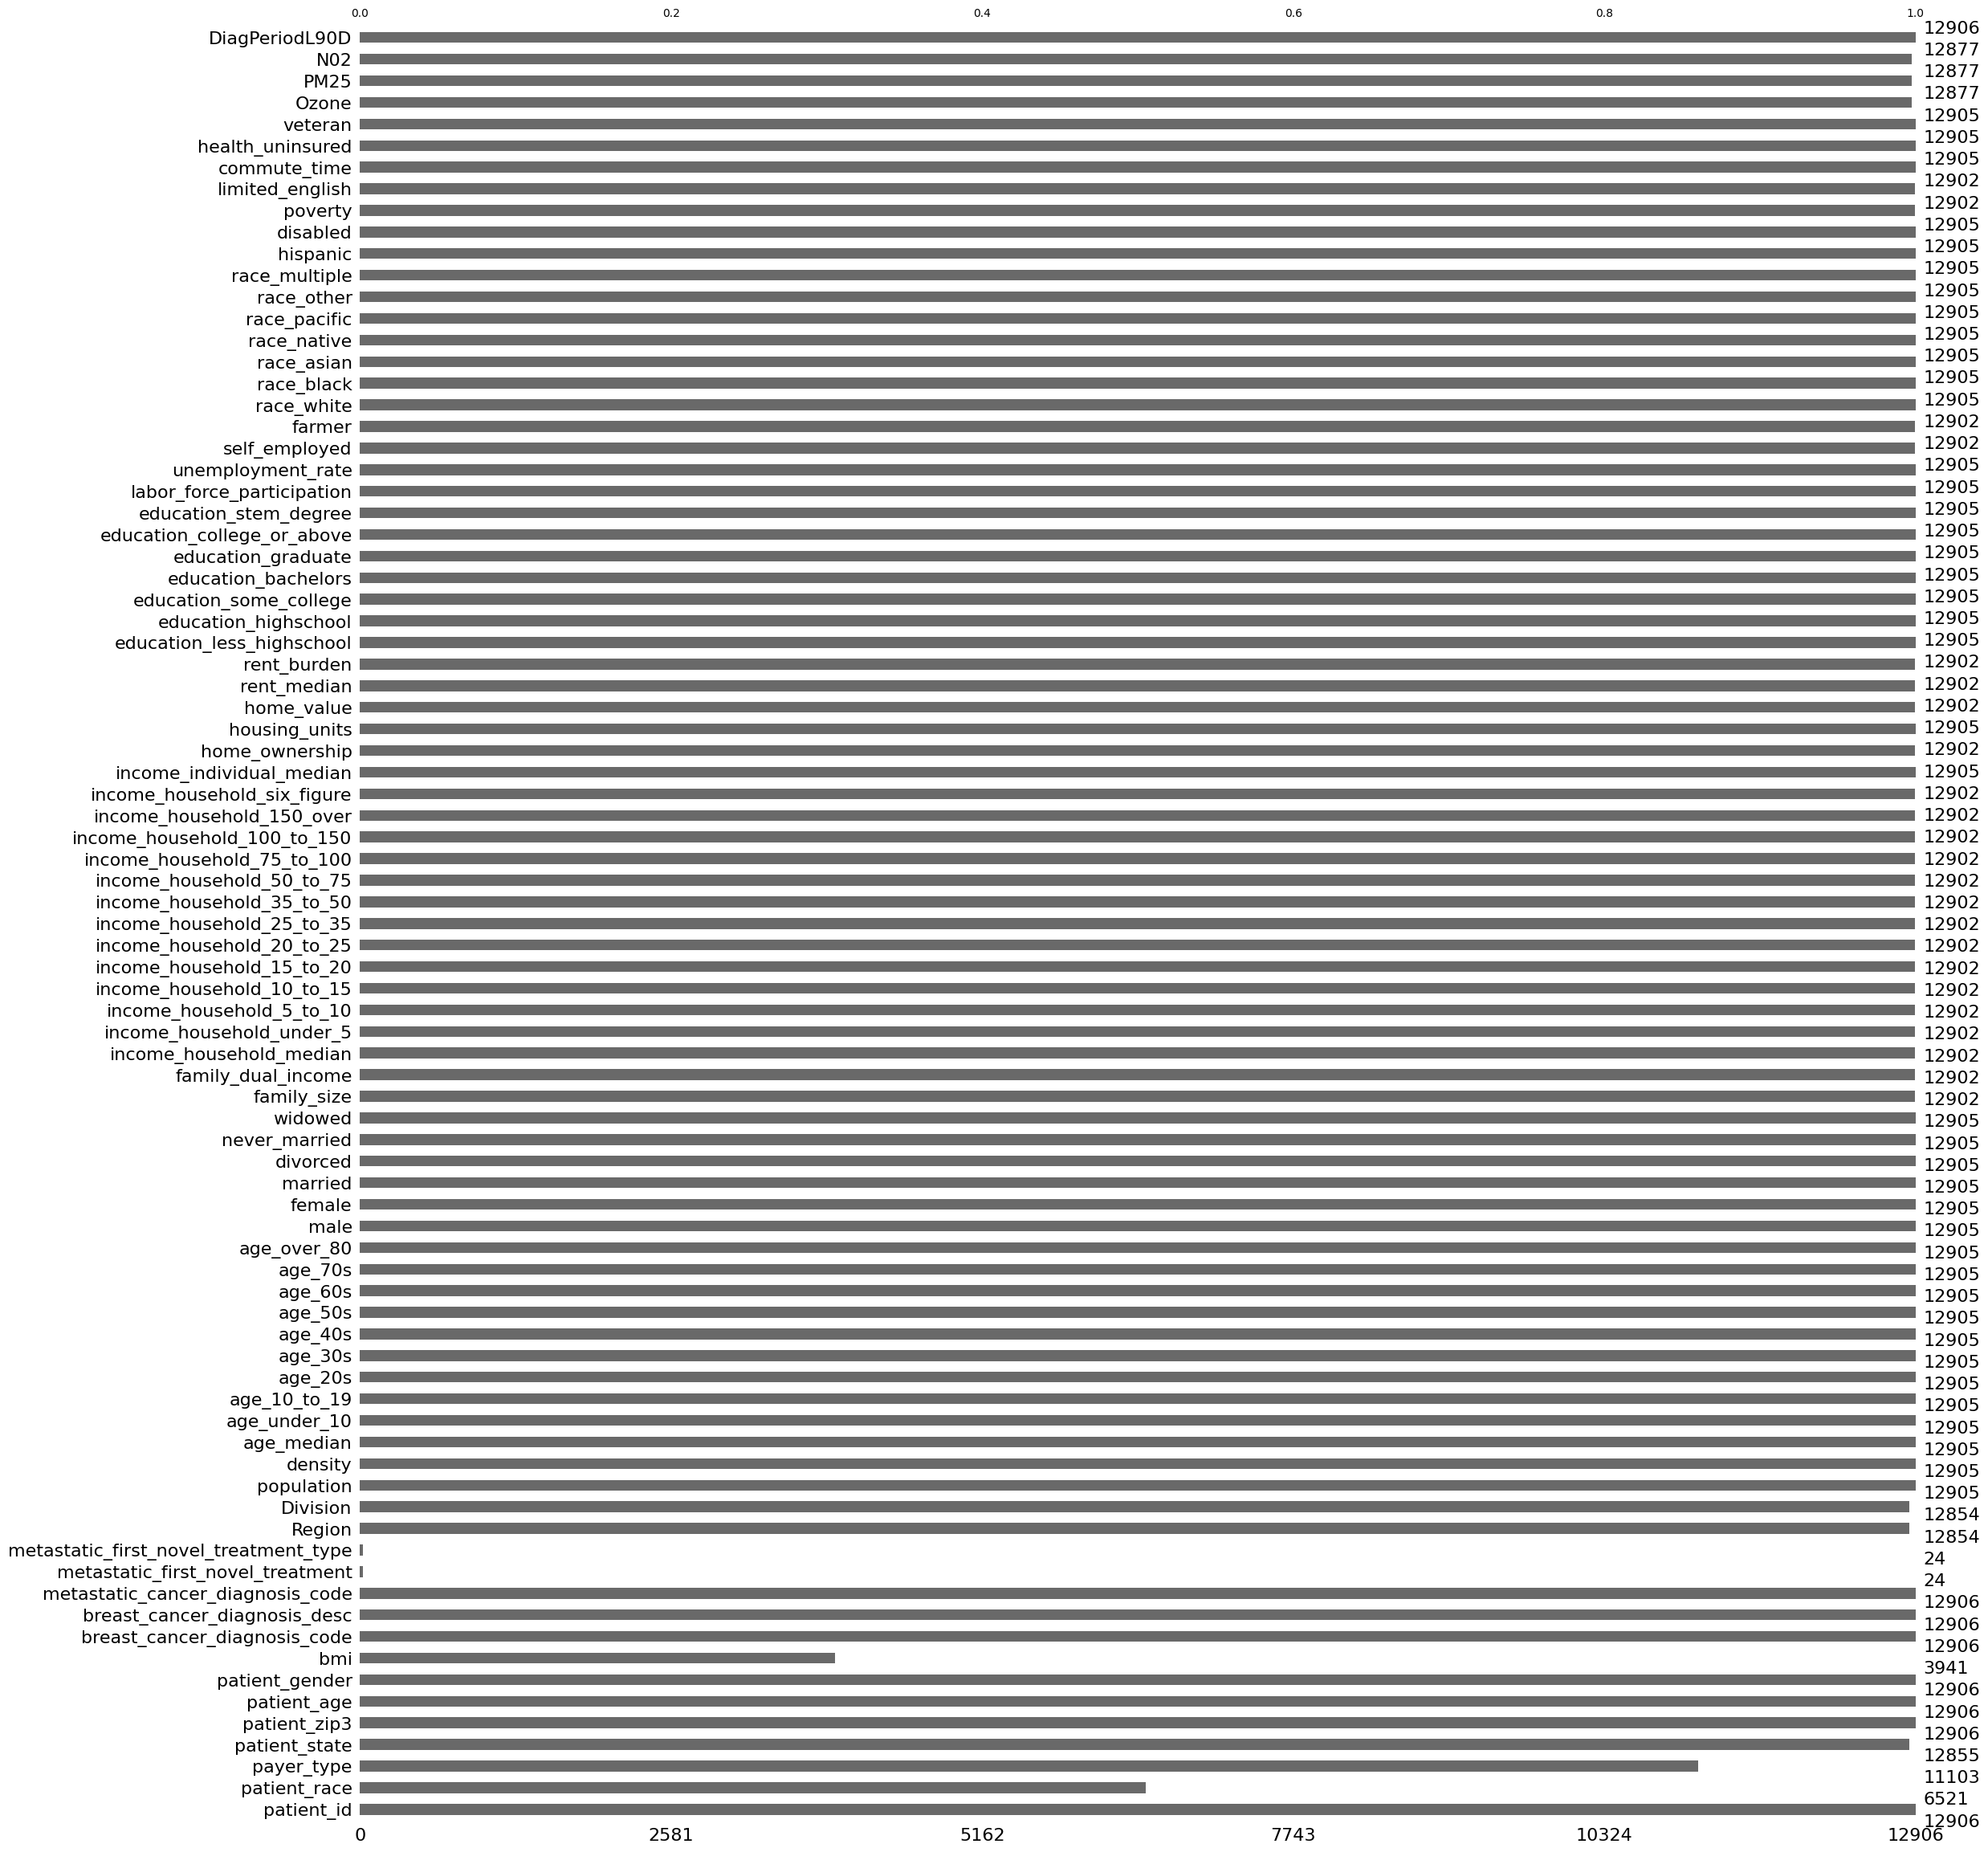

In [9]:
missingno.bar(df_train)

<Axes: >

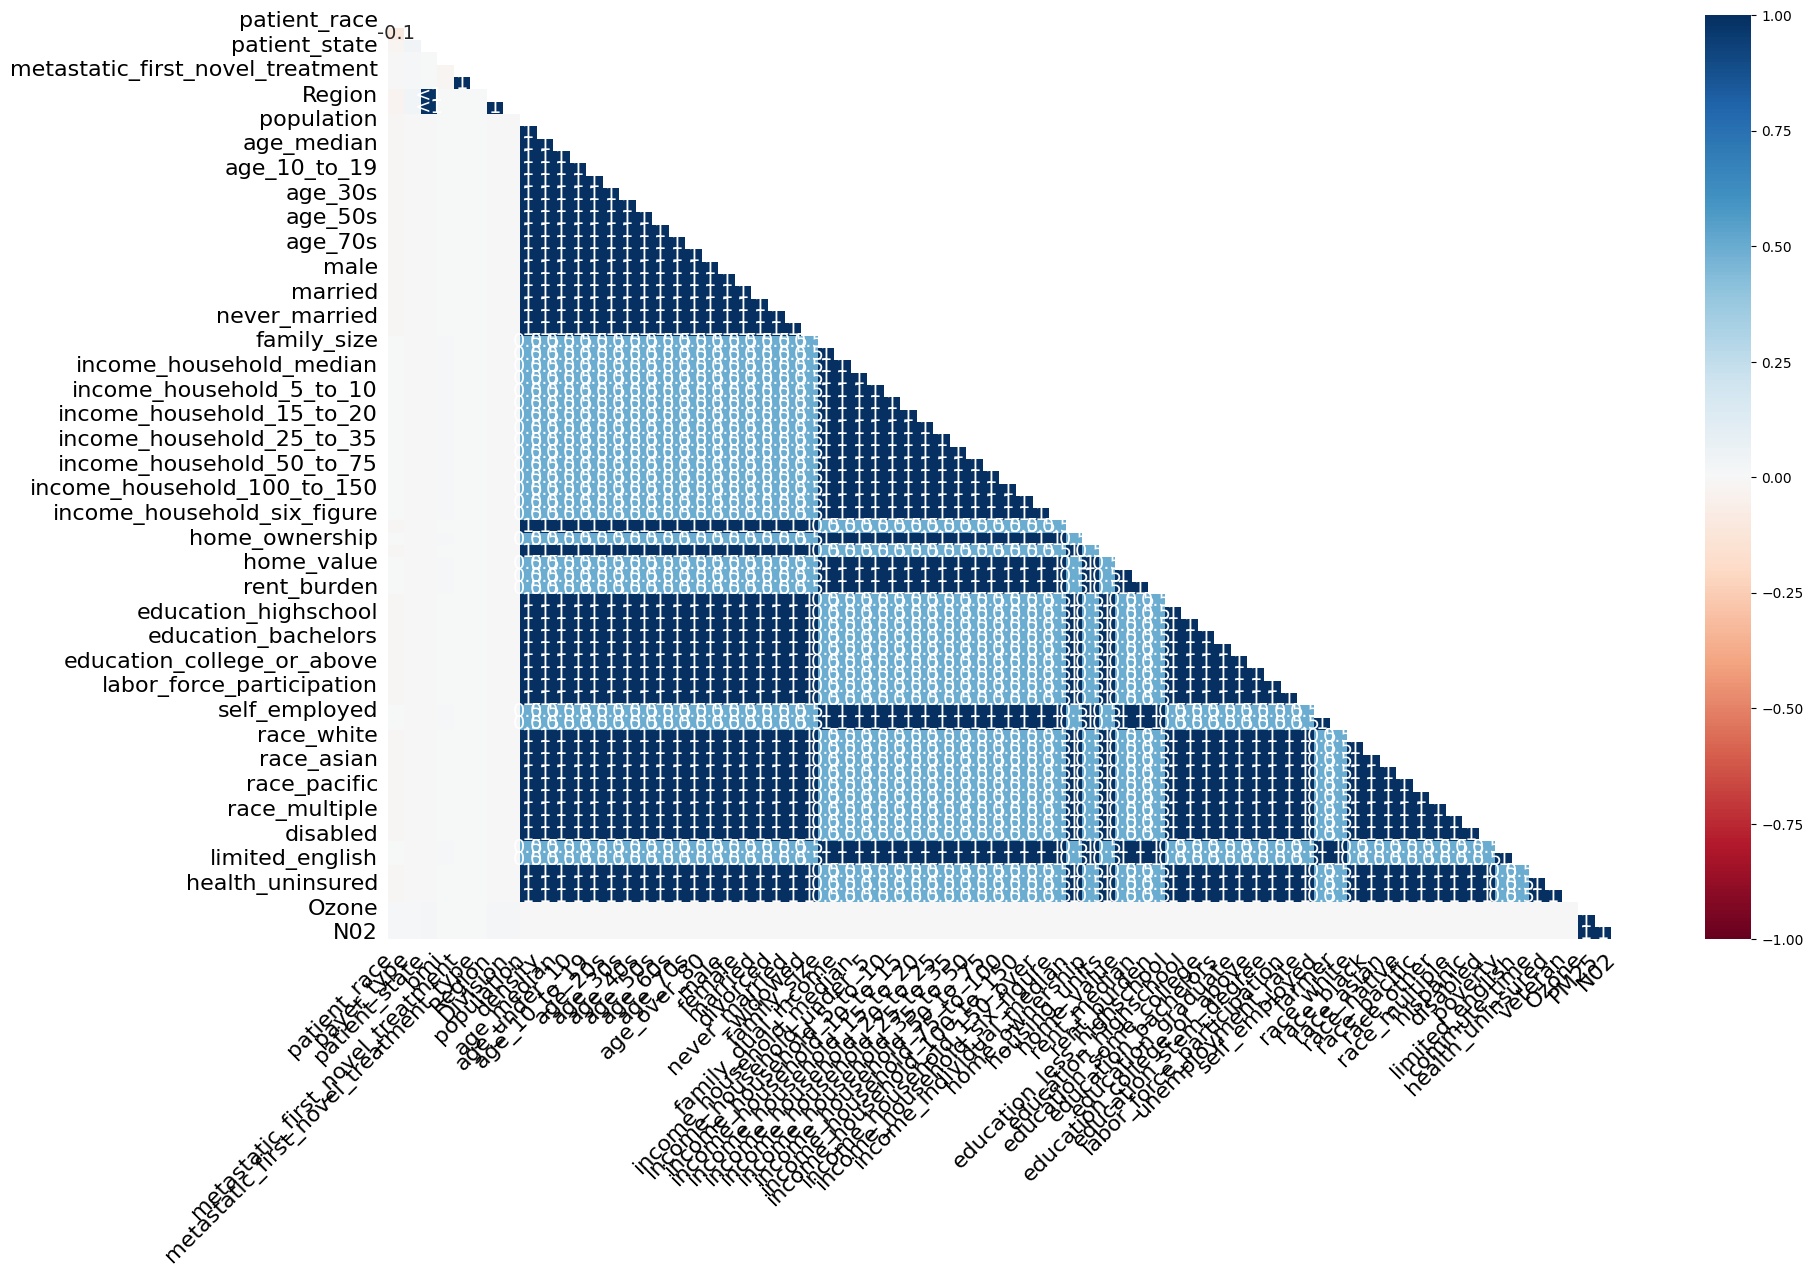

In [10]:
missingno.heatmap(df_train)

In [11]:
# Based on the above, we can drop the following columns:
# - 'metastatic_first_novel_treatment' (too many missing values)
# - 'metastatic_first_novel_treatment_type' (too many missing values)
# - 'patient_gender' (only one unique value)
# - 'patient_id' (unique identifier so prone to overfitting)
cols2drop = ['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 'patient_gender', 'patient_id']
# As a first approximation, we will also drop the following columns because they have too many missing values or too many unique values:
cols2drop += ['bmi', 'patient_race', 'payer_type']
df_train = df_train.drop(columns=cols2drop)


In [12]:
# Check how many rows have at least one missing value
missing_rows = df_train.isnull().any(axis=1).sum()
print(f"Percentage of rows with at least one missing value: {missing_rows} out of {df_train.shape[0]} rows => {missing_rows/df_train.shape[0]:.2%}")
# Drop these as a first approximation
df_train = df_train.dropna()



Percentage of rows with at least one missing value: 84 out of 12906 rows => 0.65%


Here, check the data imbalance.

<Axes: xlabel='DiagPeriodL90D', ylabel='count'>

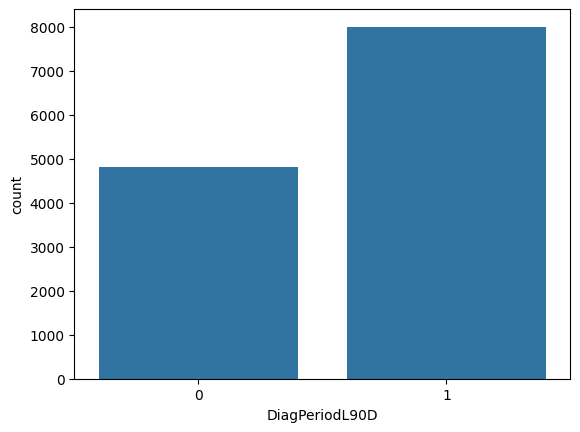

In [13]:
# Plot the distribution of the target variable
sns.countplot(data=df_train, x='DiagPeriodL90D')
# There is a class imbalance, but it is not too severe

## Model

I will use cross-validation so no need for train/test split for now

In [14]:
X = df_train.drop(columns=['DiagPeriodL90D'])
y = df_train['DiagPeriodL90D']

# Change from object to category so we can use the categorical dtype in XGBoost
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category')

# This is to focus on the positive class to circumvent the class imbalance
scale_pos_weight = len(y[y == 1]) / len(y[y == 0])

# Initialize and train the XGBClassifier and look at cross-validated RUC scores
model = XGBClassifier(use_label_encoder=False, enable_categorical=True, eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)
model.fit(X, y)
score = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(score)
#model.fit(X, y)
#for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    #scores = cross_val_score(model, X, y, cv=5, scoring=metric)
    #print(f'{metric.capitalize()} (CV=5): {scores.mean():.2f} +/- {scores.std():.2f}')

[0.78469281 0.75629114 0.78882523 0.78917642 0.77316066]


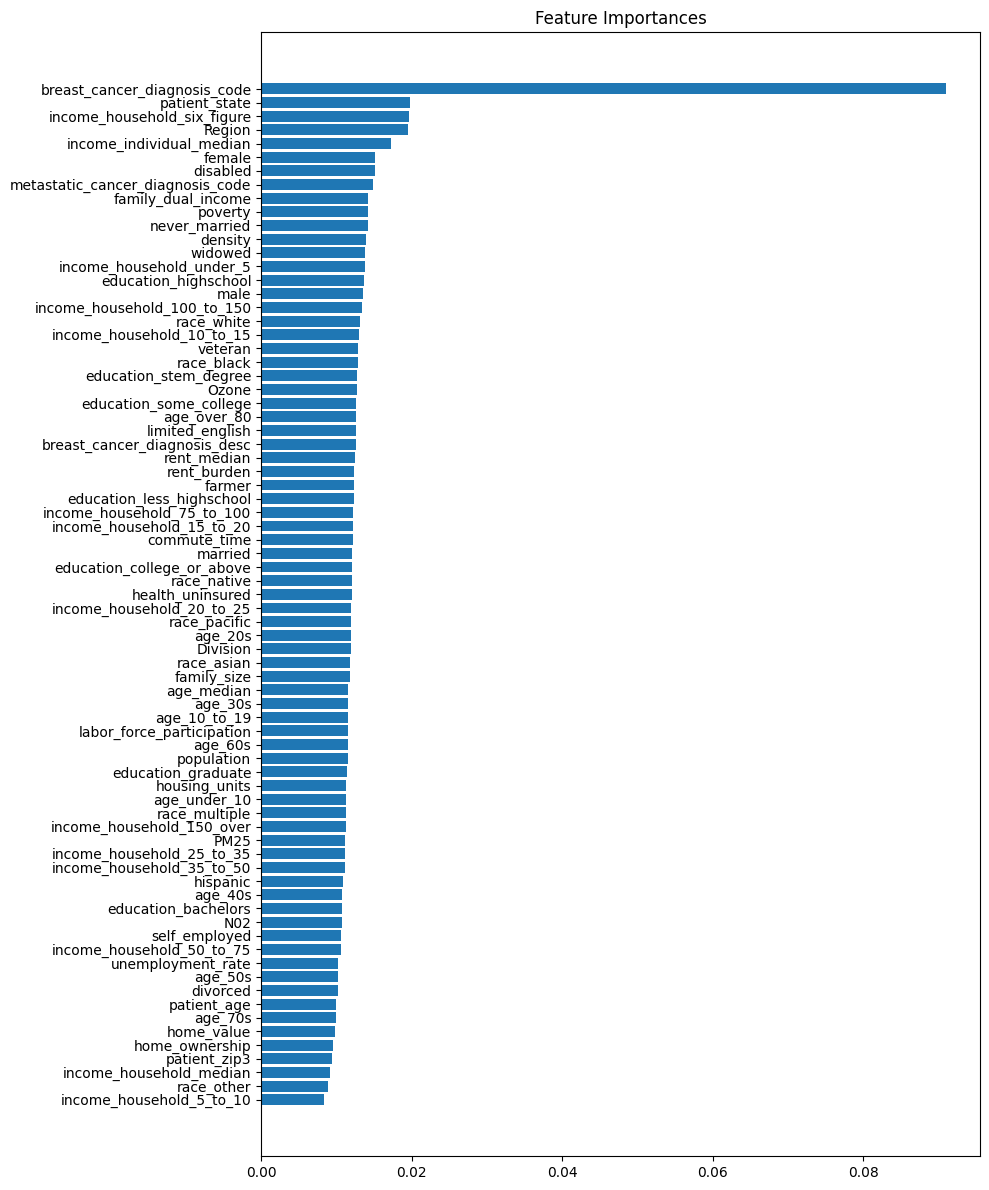

In [15]:
from sklearn.metrics import roc_curve

fig, ax = plt.subplots(1, 1, figsize=(10, 12))

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
ax.barh(range(X.shape[1]), importances[indices], align='center')
ax.set_yticks(range(X.shape[1]), [X.columns[i] for i in indices])
ax.invert_yaxis()  # Invert y axis to have the most important at the top
ax.set_title('Feature Importances')
plt.tight_layout()
plt.show()


In [16]:
# Read the test data
df_test = pd.read_csv(test_data_path)


In [17]:
missing = get_missing_summary(df_test)
display(missing)
# Look at categorical columns and their unique values
display(df_train.select_dtypes(include=['object']).nunique())
# Look at integer columns and their unique values
display(df_train.select_dtypes(include=['int64']).nunique())

{'metastatic_first_novel_treatment': 99.81008287292818,
 'metastatic_first_novel_treatment_type': 99.81008287292818,
 'bmi': 69.31975138121547,
 'patient_race': 50.08632596685083,
 'payer_type': 13.121546961325967,
 'patient_state': 0.36256906077348067,
 'Region': 0.36256906077348067,
 'Division': 0.36256906077348067,
 'Ozone': 0.24171270718232044,
 'PM25': 0.24171270718232044,
 'N02': 0.24171270718232044,
 'family_size': 0.017265193370165743,
 'family_dual_income': 0.017265193370165743,
 'income_household_median': 0.017265193370165743,
 'income_household_under_5': 0.017265193370165743,
 'income_household_5_to_10': 0.017265193370165743,
 'income_household_10_to_15': 0.017265193370165743,
 'income_household_15_to_20': 0.017265193370165743,
 'income_household_20_to_25': 0.017265193370165743,
 'income_household_25_to_35': 0.017265193370165743,
 'income_household_35_to_50': 0.017265193370165743,
 'income_household_50_to_75': 0.017265193370165743,
 'income_household_75_to_100': 0.0172651933

patient_state                       47
breast_cancer_diagnosis_code        50
breast_cancer_diagnosis_desc        50
metastatic_cancer_diagnosis_code    43
Region                               4
Division                             9
dtype: int64

patient_zip3      731
patient_age        67
DiagPeriodL90D      2
dtype: int64

# Correlation

In [1]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Example usage with a pandas DataFrame
# df is your DataFrame
# 'column1' and 'column2' are the categorical columns in your DataFrame
df  = pd.read_csv(training_data_path)
cramers_v_val = cramers_v(df['patient_zip3'], df['patient_state'])
print(f"Cramer's V: {cramers_v_val}")

NameError: name 'pd' is not defined